In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [154]:
df=pd.read_csv("bengaluru_house_prices.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [155]:
df.shape

(13320, 9)

In [156]:
df=df.drop(['area_type','availability','society'],axis=1)
df

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [157]:
df.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [158]:
median=df['balcony'].median()
df['balcony'].fillna(median,inplace =True)
df['balconys']=df['balcony']

In [159]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
balcony        0
price          0
balconys       0
dtype: int64

In [160]:
df1=df.copy()

In [161]:
df1=df1.drop(['balcony'],axis=1)

In [162]:
df1

,location,size,total_sqft,bath,price,balconys
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,1.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,3.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,1.0
4,Kothanur,2 BHK,1200,2.0,51.00,1.0
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,0.0
13316,Richards Town,4 BHK,3600,5.0,400.00,2.0
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,1.0
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,1.0


In [163]:
df1.dropna(subset=['size'],inplace=True)
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [164]:
df1['bhk']=df1['size'].apply(lambda x: int(str(x).split(' ')[0]))

In [165]:
df2=df1

In [166]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [167]:
df2[df2.bhk==43]

,location,size,total_sqft,bath,price,balconys,bhk
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,0.0,43


In [168]:
df2[df2.bhk>20]
df2

,location,size,total_sqft,bath,price,balconys,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,1.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,3.0,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,1.0,3
4,Kothanur,2 BHK,1200,2.0,51.00,1.0,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,0.0,5
13316,Richards Town,4 BHK,3600,5.0,400.00,2.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,1.0,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,1.0,4


In [169]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [170]:
df2[df2['total_sqft'].apply(is_float)]# to find wheather string content
df2

,location,size,total_sqft,bath,price,balconys,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,1.0,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,3.0,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3.0,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,1.0,3
4,Kothanur,2 BHK,1200,2.0,51.00,1.0,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,0.0,5
13316,Richards Town,4 BHK,3600,5.0,400.00,2.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,1.0,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,1.0,4


In [171]:
def convert_avg(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1])//2)
    try :
        return float(x)
    except:
        return None

In [172]:
df3=df2.copy()
df3['total_sqft']=df3['total_sqft'].apply(convert_avg)

In [173]:
df3

,location,size,total_sqft,bath,price,balconys,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,1.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,3.0,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,1.0,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,1.0,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,0.0,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,2.0,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,1.0,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,1.0,4


In [174]:
print(df3.loc[30])

location      Yelahanka
size              4 BHK
total_sqft       3525.0
bath                4.0
price             186.0
balconys            0.0
bhk                   4
Name: 30, dtype: object


In [175]:
df3.head(5)

,location,size,total_sqft,bath,price,balconys,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,1.0,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,3.0,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,1.0,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,1.0,2


In [176]:
df4=df3.copy()
df4['price_per_sqrt']=df4['price']*100000/df4['total_sqft']

In [177]:
df4

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,1.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,3.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,1.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,1.0,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,0.0,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,2.0,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,1.0,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,1.0,4,10407.336319


In [178]:
df4.dropna(subset=['location'],inplace=True)
len(df4.location.unique())

1304

In [179]:
df4.location=df4.location.apply(lambda x: x.strip())
location_stats=df4.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [180]:
len(location_stats[location_stats<=10])

1052

In [181]:
location_10_less=location_stats[location_stats<=10]
len(location_10_less)

1052

In [182]:
len(df4.location.unique())

1293

In [183]:

df4.location=df4.location.apply(lambda x: 'other' if x in location_10_less else x)
len(df4.location.unique())

242

In [184]:
df4.drop(['balconys'],axis=1)

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [185]:
df4.head(10)

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,1.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,3.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,1.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,1.0,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,1.0,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,2.0,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,2.0,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,1.0,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,2.0,6,36274.509804


In [186]:
# assume that bhk means bedroom hall kitchen it takes around each of bhk is more than 300 so remove that anomalies

In [187]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
9,other,6 Bedroom,1020.0,6.0,370.0,2.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,2.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,1.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,0.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,2.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,2.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,2.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,1.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,3.0,5,9043.927649


In [188]:
df4.shape

(13303, 8)

In [189]:
df5=df4[~(df4.total_sqft/df4.bhk <300)]

In [190]:
df5.shape

(12559, 8)

In [191]:
#remove the ouliers for the price per _sqrt
df5.price_per_sqrt.describe()

count     12513.000000
mean       6282.075818
std        4169.460491
min         267.829813
25%        4181.818182
50%        5274.725275
75%        6896.551724
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [192]:
def remove_outlier(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqrt)
        s=np.std(subdf.price_per_sqrt)
        useful_data=subdf[(subdf.price_per_sqrt>=(m-s)) & (subdf.price_per_sqrt<=m+s)]
        df_out=pd.concat([df_out,useful_data],ignore_index=True)
    return df_out   


In [193]:
df6=remove_outlier(df5)#in each location 
df6.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [194]:
# in some cases same location 2bhk and 1bhk had the same acurate price or 1 is high than 2 so overcome that 

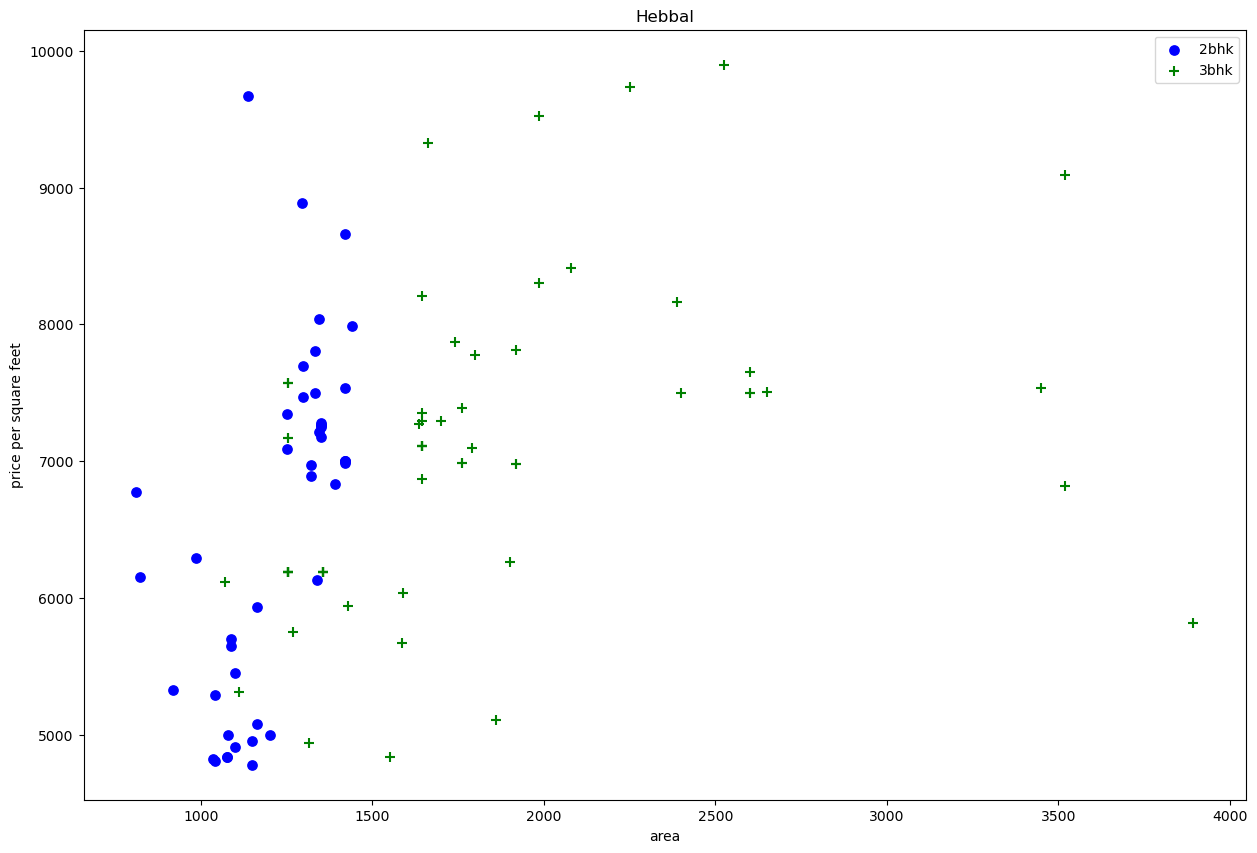

In [195]:
def plot_scatter_chart(df,location):
    plt.figure(figsize=(15,10))
    bhk2=df[(df.location==location)&(df.bhk==2)]
    bhk3=df[(df.location==location)&(df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqrt,color='blue',label='2bhk',s=45)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqrt,marker='+',color='green',label='3bhk',s=45)    
    plt.xlabel("area")
    plt.ylabel("price per square feet")
    plt.title(location)
    plt.legend()
plot_scatter_chart(df6,'Hebbal')    

In [196]:
'''We should also remove properties where for same location, the price 
of (for example) 3 bedroom apartment is less than 2 bedroom 
apartment w same square ft area). What we will do is for a given 
location, we will build a dictionary of stats per bhk, Le
{
'1':{
'mean': 4000,

'std': 2008,

'count': 34
},
'2':{
    
 'mean' :4380

'std': 2300

'count' :22

Now we cant remove those 2 BHK apartments whose price_per_sqft is
    less than mean price_per_sqft of 1 BHK apartinent'''
df6

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,1.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,2.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.00,0.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.00,2.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10263,other,2 BHK,1353.0,2.0,110.00,2.0,2,8130.081301
10264,other,1 Bedroom,812.0,1.0,26.00,0.0,1,3201.970443
10265,other,3 BHK,1440.0,2.0,63.93,2.0,3,4439.583333
10266,other,2 BHK,1075.0,2.0,48.00,2.0,2,4465.116279


In [197]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqrt),
                'std':np.std(bhk_df.price_per_sqrt),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqrt<=(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')    
df7=remove_bhk_outliers(df6)

In [198]:
df7

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,1.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,2.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,0.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2.0,2,11983.805668
...,...,...,...,...,...,...,...,...
10259,other,2 BHK,1200.0,2.0,70.0,3.0,2,5833.333333
10260,other,1 BHK,1800.0,1.0,200.0,1.0,1,11111.111111
10263,other,2 BHK,1353.0,2.0,110.0,2.0,2,8130.081301
10264,other,1 Bedroom,812.0,1.0,26.0,0.0,1,3201.970443


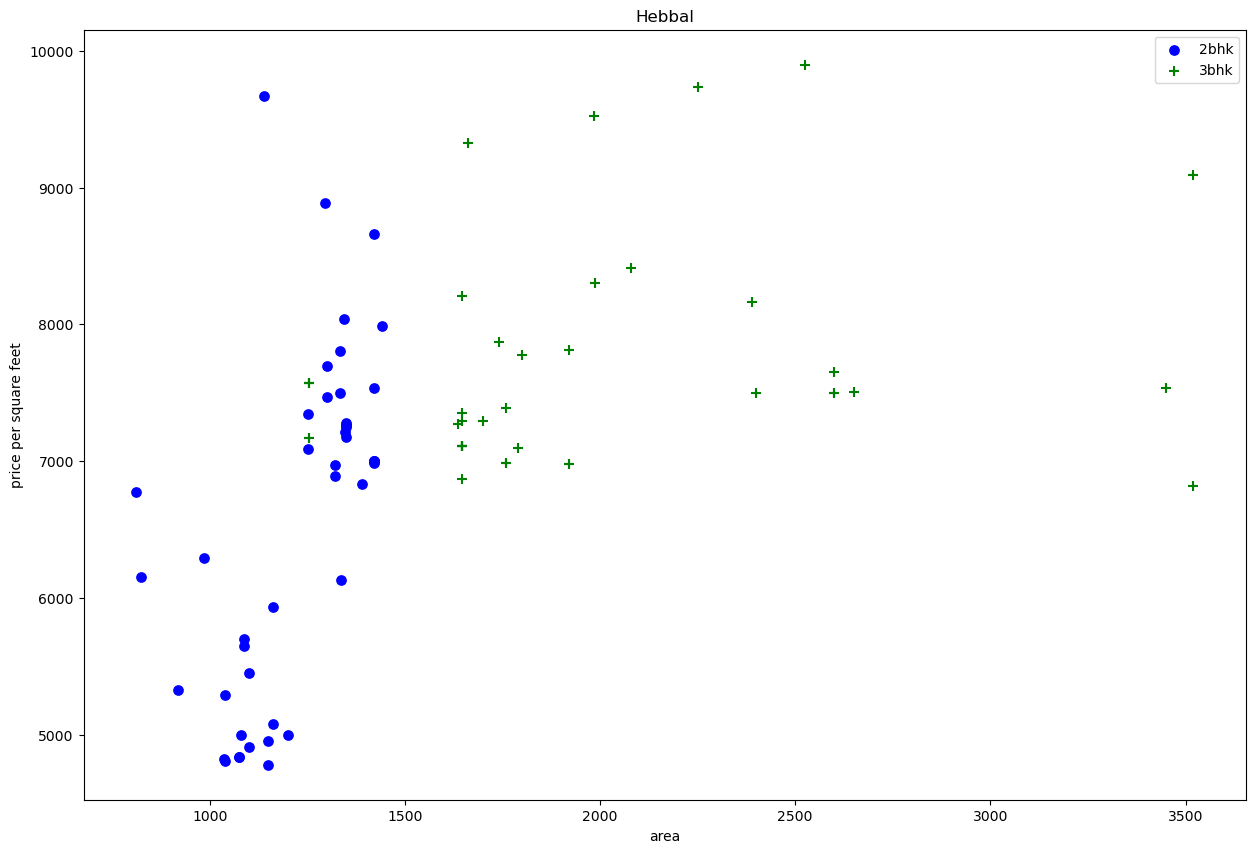

In [199]:
plot_scatter_chart(df7,'Hebbal')   

Text(0, 0.5, 'count')

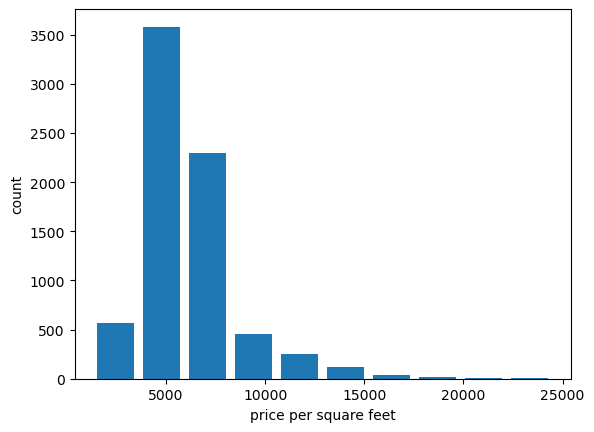

In [200]:
plt.hist(df7.price_per_sqrt,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel("count")

In [201]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6., nan,  7.,  9., 12., 16., 13.])

In [202]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
5299,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,2.0,10,4000.000000
8512,other,10 BHK,12000.0,12.0,525.0,2.0,10,4375.000000
8601,other,16 BHK,10000.0,16.0,550.0,2.0,16,5500.000000
9334,other,11 BHK,6000.0,12.0,150.0,2.0,11,2500.000000
9665,other,13 BHK,5425.0,13.0,275.0,0.0,13,5069.124424


Text(0, 0.5, 'count')

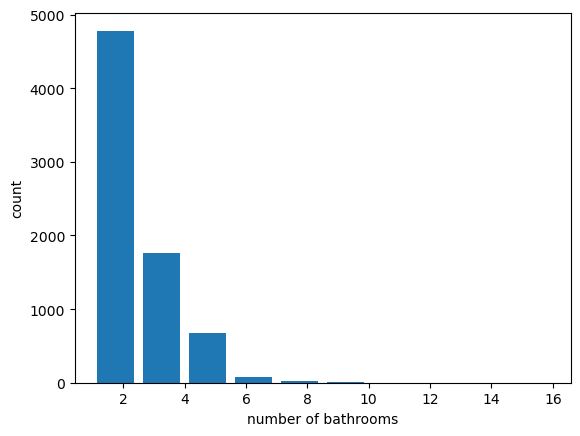

In [203]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [204]:
df7[df7.bath>df7.bhk+2]# remove no of bath is more than the bhk

,location,size,total_sqft,bath,price,balconys,bhk,price_per_sqrt
1629,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,2.0,4,3252.032520
5260,Nagasandra,4 Bedroom,7000.0,8.0,450.0,2.0,4,6428.571429
6739,Thanisandra,3 BHK,1806.0,6.0,116.0,2.0,3,6423.034330
8437,other,6 BHK,11338.0,9.0,1000.0,1.0,6,8819.897689


In [205]:
df8=df7[~(df7.bath>df7.bhk+2)]
m=np.mean(df8.bath)
df8['bath'].fillna(m,inplace=True)

C:\Users\91868\AppData\Local\Temp\ipykernel_2184\2755081505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['bath'].fillna(m,inplace=True)


In [206]:
df8.shape

(7334, 8)

In [207]:
df8=df8.drop(['size','price_per_sqrt','balconys'],axis='columns')
df8.isnull().sum()

location      0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

In [208]:
dummies=pd.get_dummies(df8.location)# in this we convert the string formate to the numerical data by using one hot encoding
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10263,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [209]:
df9=pd.concat([df8,dummies.drop('other',axis='columns')],axis='columns')
df9

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,other,1200.0,2.0,70.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10260,other,1800.0,1.0,200.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10263,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
df10=df9.drop(['location'],axis='columns')
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10259,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10260,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10263,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10264,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
x=df10.drop(['price'],axis='columns')
x.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [212]:
y=df10.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [213]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [214]:
from sklearn.linear_model import LinearRegression
mod=LinearRegression()
mod.fit(X_train,Y_train)
mod.score(X_test,Y_test)

0.8217803504317299

In [215]:
#cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.79928803, 0.8766161 , 0.83937127, 0.82997671, 0.84896505])

In [216]:
# grid cv in this we can continue our model with different algorithms
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(x,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'fit_intercept':[True,False]
            }
        },
     'lasso':{
         'model':Lasso(),
         'params':{
             'alpha':[1,2],
             'selection':['random','cyclic']
         }
     } ,
     'decision_tree':{
         'model':DecisionTreeRegressor(),
         'params':{
             'criterion':['mse','friedman_mse'],
             'splitter':['best','random']
         }
     }   
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])     
find_best_model(x,y)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\91868\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\91868\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\91868\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\91868\anaconda3\lib\site-packages\sklearn\base.py", line 

,model,best_score,best_params
0,linear_regression,0.839815,{'fit_intercept': False}
1,lasso,0.699348,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.665663,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


In [217]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [218]:
np.where(x.columns=='1st Phase JP Nagar')[0][0] #this method is important to find the index regarding of input column

4

In [219]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(x.columns==location)[0][0]
    z=np.zeros(len(x.columns))
    z[0]=sqft
    z[1]=bath
    z[2]=bhk
    if loc_index >=0:
        z[loc_index]=1
    return mod.predict([z])

In [220]:
predict_price('1st Phase JP Nagar',1000,3,5)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([69.17609019])

In [221]:
predict_price('1st Phase JP Nagar',1000,2,5)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.24504563])

In [222]:
predict_price('Vijayanagar',1000,2,4)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52.34900869])

In [223]:
predict_price('Vijayanagar',1000,2,3)

C:\Users\91868\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([58.17281303])

In [ ]:
import pickle
with open('benglore_home_price.pickle','')
